This trainConvnetDogsCatsp130 Jupyter Python Notebook is stored in my home dir tensorFlow/mlenv.  The original data from Kaggle is at mlenv/kaggle_original_data/dogs_vs_cats, while the following script moves the image files into training, validation and test directories and keeping dog and cat images separate.  This is in preparation to create the tensors to input to keras fit ML convnet!

Usage notes:
dogs_vs_cats dir at /home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats cannot exist because of the mkdir...

In [3]:
import os, shutil

original_dataset_dir = '/home/sbradley/tensorflow/mlenv/kaggle_original_data/dogs_vs_cats/train'
base_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [4]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_cats_dir)))

print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))




total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


Below it is evident that the tools for learning the images or fitting the data come from keras.  While for this example, the data is from  keras.



In [5]:
from keras import layers
from keras import models
model = models.Sequential()

#(3,3) below is likely the size of the conv  sliding "window":
model.add(layers.Conv2D(32, (3,3), activation='relu',
         input_shape=(150,150,3)))
#find the max value in each 2 x 2 square?:
model.add(layers.MaxPooling2D((2,2)))

# Do caps indicate that each of the "add" parameters 
# are constructed objects and/or functional objects of type Conv2D etc)
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),  
        # what about the RGB dimension?  150x150 x 3, right? Right!  see for loop out below!
        # since train_datagen is an ImageDataGenerator, perhaps the RGB dim is implicit. Yess see below!
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),  
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    print('labels : ', labels_batch)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)
labels :  [0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.]


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,   # 50 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 179s 2s/step - loss: 0.6871 - acc: 0.5465 - val_loss: 0.6630 - val_acc: 0.5840
Epoch 2/30
100/100 [==============================] - 178s 2s/step - loss: 0.6561 - acc: 0.6030 - val_loss: 0.6470 - val_acc: 0.6030
Epoch 3/30
100/100 [==============================] - 161s 2s/step - loss: 0.6108 - acc: 0.6655 - val_loss: 0.6242 - val_acc: 0.6200
Epoch 4/30
100/100 [==============================] - 166s 2s/step - loss: 0.5641 - acc: 0.7020 - val_loss: 0.5989 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 171s 2s/step - loss: 0.5435 - acc: 0.7185 - val_loss: 0.5848 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 167s 2s/step - loss: 0.5063 - acc: 0.7465 - val_loss: 0.5750 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 166s 2s/step - loss: 0.4937 - acc: 0.7605 - val_loss: 0.5660 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 166s 2s/step - 

In [9]:
model.save('cats_and_dogs_small_3.h5')

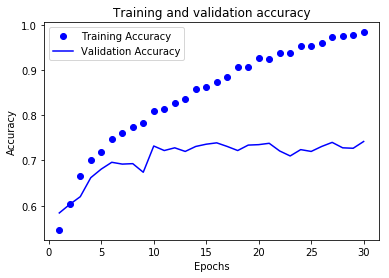

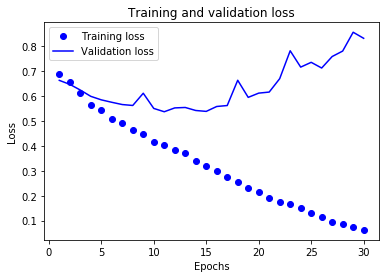

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
training_loss = history.history['loss']
#print("training_loss: ", training_loss) 
validation_loss = history.history['val_loss']
#print("validation_loss: ", validation_loss) 

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Now the validation data looks somewhat belivable, but the training looks ridiculously good--I guess it is overfitting to itself and doing better and better at it.